#DAY 2 Lab Session 
>## Feature Extraction techniques

# Basic feature extraction 

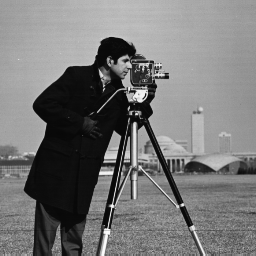

In [3]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/cameraman1.png")

# Now, the variable 'image' stores the pixel values of image
#print(image)
cv2_imshow(image)

## Noise addition

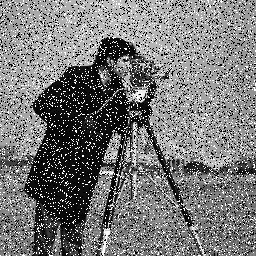

In [8]:
import random
import cv2
import numpy as np
def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300, 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('/content/cameraman1.png',
				cv2.IMREAD_GRAYSCALE)

salted_image = add_noise(img)
#Storing the image
cv2_imshow(salted_image)


## Salt & papper

In [5]:
def SaltAndPaper(image, density):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # parameter for controlling how much salt and paper are added
    threshhold = 1 - density

    # loop every each pixel and decide add the noise or not base on threshhold (density)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            possibility = random.random()
            if possibility < density:
                output[i][j] = 0
            elif possibility > threshhold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

## mean filter

In [6]:

def MeanFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # creat an empty variable
    result = 0
    filter_size = filter_size*filter_size
    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                for y in range(-2, 3):
                    for x in range(-2, 3):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0

    return output



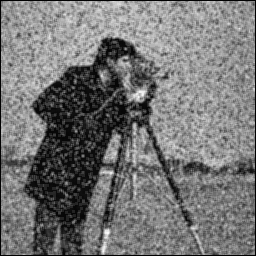

In [9]:
mean_filter1 = MeanFilter(salted_image,3)
cv2_imshow(mean_filter1)

## median filter

In [10]:

def MedianFilter(image, filter_size):
    # create an empty array with same size as input image

    filter_size = filter_size*filter_size
    output = np.zeros(image.shape, np.uint8)

    # create the kernel array of filter as same size as filter_size
    filter_array = [image[0][0]] * filter_size

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                filter_array[0] = image[j-1, i-1]
                filter_array[1] = image[j, i-1]
                filter_array[2] = image[j+1, i-1]
                filter_array[3] = image[j-1, i]
                filter_array[4] = image[j, i]
                filter_array[5] = image[j+1, i]
                filter_array[6] = image[j-1, i+1]
                filter_array[7] = image[j, i+1]
                filter_array[8] = image[j+1, i+1]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[4]

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
                filter_array[13] = image[j+1, i]
                filter_array[14] = image[j+2, i]
                filter_array[15] = image[j-2, i+1]
                filter_array[16] = image[j-1, i+1]
                filter_array[17] = image[j, i+1]
                filter_array[18] = image[j+1, i+1]
                filter_array[19] = image[j+2, i+1]
                filter_array[20] = image[j-2, i+2]
                filter_array[21] = image[j-1, i+2]
                filter_array[22] = image[j, i+2]
                filter_array[23] = image[j+1, i+2]
                filter_array[24] = image[j+2, i+2]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[12]
    return output

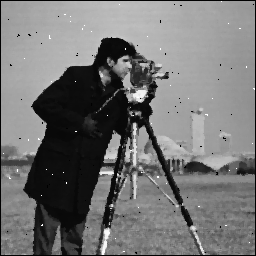

In [49]:
median_filter1 = MedianFilter(salted_image,3)

cv2_imshow(median_filter1)

## noise with sobel and prewitt

### Sobel edge detector

In [37]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    '''if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()'''

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    '''if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()'''

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    '''if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()'''

    return output


In [43]:
def Edge_detection(image, filter, verbose=True, plot_name="plot"):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title(plot_name)
        plt.show()

Found 3 Channels : (256, 256, 3)
Converted to Gray Channel. Size : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


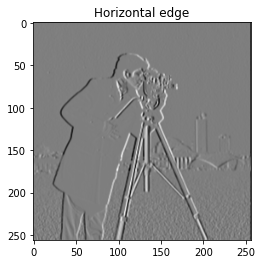

In [44]:
from matplotlib import pyplot as plt
filter_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
Edge_detection(image, filter_horizontal, verbose=True, plot_name ="Horizontal edge")

Found 3 Channels : (256, 256, 3)
Converted to Gray Channel. Size : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


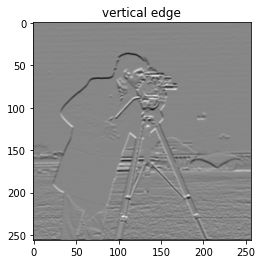

In [45]:
from matplotlib import pyplot as plt
filter_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
 
Edge_detection(image, filter_vertical, verbose=True,plot_name="vertical edge")

### prewitt edge detector

Found 3 Channels : (256, 256, 3)
Converted to Gray Channel. Size : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


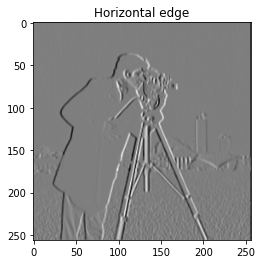

In [46]:
from matplotlib import pyplot as plt
filter_horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
 
Edge_detection(image, filter_horizontal, verbose=True, plot_name ="Horizontal edge")

Found 3 Channels : (256, 256, 3)
Converted to Gray Channel. Size : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


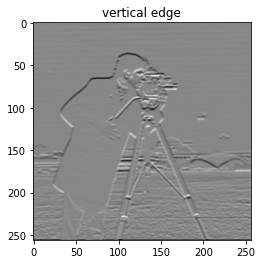

In [47]:
from matplotlib import pyplot as plt
filter_vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
 
Edge_detection(image, filter_vertical, verbose=True,plot_name="vertical edge")

# noise + sobel

Image Shape : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


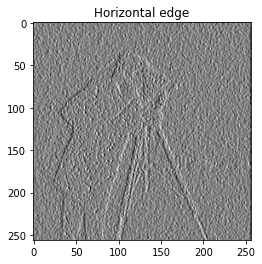

In [50]:
from matplotlib import pyplot as plt
filter_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
Edge_detection(salted_image, filter_horizontal, verbose=True, plot_name ="Horizontal edge")

## noise + mean + sobel

Image Shape : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


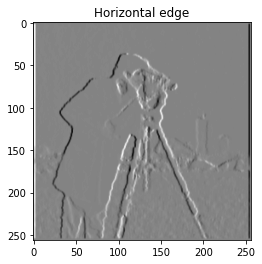

In [51]:
from matplotlib import pyplot as plt
filter_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
Edge_detection(mean_filter1, filter_horizontal, verbose=True, plot_name ="Horizontal edge")

## noise + median + sobel

Image Shape : (256, 256)
Kernel Shape : (3, 3)
Output Image size : (256, 256)


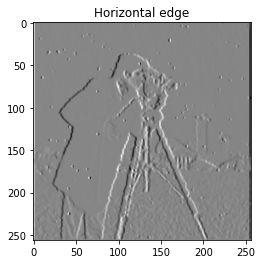

In [52]:
from matplotlib import pyplot as plt
filter_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
Edge_detection(median_filter1, filter_horizontal, verbose=True, plot_name ="Horizontal edge")

## recursive mean

## recursive median

## Local Binary pattern (LBP)

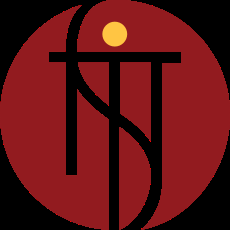

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/National_Institute_of_Technology_Sikkim.svg.png")

# Now, the variable 'image' stores the pixel values of image
#print(image)
cv2_imshow(image)


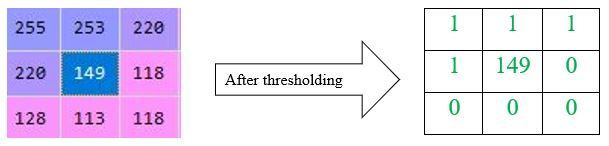

*** 1 x 2^7 + 1 x 2^6 + 1 x 2^5 + 0 x 2^4 + 0 x 2^3 + 0 x 2^2 + 0 x 2^1 +1 x 2^0 ***
= 128 + 64 + 32 + 0 + 0 + 0 + 0 + 1
= 225

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

	
def get_pixel(img, center, x, y):
	
	new_value = 0
	
	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1
			
	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass
	
	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []
	
	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))
	
	# top
	val_ar.append(get_pixel(img, center, x-1, y))
	
	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))
	
	# right
	val_ar.append(get_pixel(img, center, x, y + 1))
	
	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))
	
	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))
	
	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))
	
	# left
	val_ar.append(get_pixel(img, center, x, y-1))
	
	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0
	
	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]
		
	return val




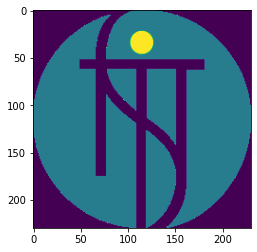

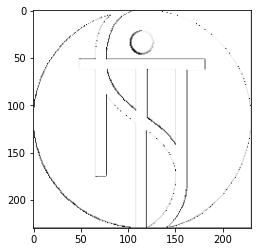

LBP Program is finished


In [87]:
path = '/content/National_Institute_of_Technology_Sikkim.svg.png'
img_gray = cv2.imread(path, 0)
height, width = img_gray.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
#img_gray = cv2.cvtColor(img_bgr,
						#cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_gray)
plt.show()

plt.imshow(img_lbp, cmap ="gray",vmin=0, vmax=255)
plt.show()

print("LBP Program is finished")

### Random image to illustrate

In [88]:
img_gray_1 = np.random.rand(10,10)

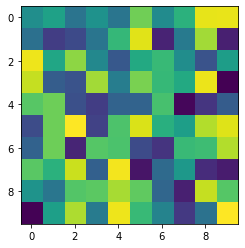

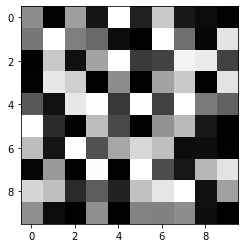

LBP Program is finished


In [98]:
img_gray = img_gray_1 + 50

height, width = img_gray.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
#img_gray = cv2.cvtColor(img_bgr,
						#cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_gray)
plt.show()

plt.imshow(img_lbp, cmap ="gray",vmin=0, vmax=255)
plt.show()

print("LBP Program is finished")

### image random

In [96]:
print(img_gray)

[[0.49541479 0.57302017 0.38789882 0.51192943 0.39232518 0.78364381
  0.48336164 0.64364019 0.96196873 0.96701885]
 [0.37025615 0.1860587  0.22666641 0.39273438 0.66731153 0.95318273
  0.10186771 0.41412503 0.85996033 0.09085147]
 [0.97221493 0.59485933 0.82871881 0.47014433 0.28002499 0.60941339
  0.67328816 0.49131387 0.2572545  0.55817825]
 [0.9119201  0.29798649 0.25846101 0.85950888 0.424664   0.79955315
  0.67190294 0.60991244 0.97072912 0.00464225]
 [0.74029812 0.77827051 0.24667364 0.18635669 0.32267108 0.32005582
  0.70912552 0.02084786 0.15662113 0.29429819]
 [0.23450033 0.77790634 0.9983018  0.20242338 0.7207467  0.94258011
  0.63171309 0.56170199 0.88275307 0.95045161]
 [0.31811406 0.77873162 0.10801945 0.73621184 0.71833089 0.23374424
  0.15548468 0.68006429 0.69181694 0.88313188]
 [0.7444124  0.64090732 0.91828307 0.30920564 0.98018266 0.06223191
  0.34697267 0.53325656 0.13237852 0.08163059]
 [0.51463966 0.39479363 0.73346772 0.75047469 0.87026589 0.75489526
  0.33420058

In [97]:
img_lbp

array([[141,   4, 159,  21, 255,  33, 201,  24,  12,   2],
       [119, 255, 127, 106,  12,   0, 255, 111,   6, 227],
       [  0, 200,  16, 164, 255,  59,  65, 244, 235,  65],
       [  2, 231, 207,   0, 141,   0, 162, 201,   0, 227],
       [ 90,  17, 231, 255,  55, 255,  65, 255, 123,  97],
       [255,  42,   0, 189,  72,   0, 146, 185,  24,   0],
       [189,  20, 255,  81, 166, 215, 191,  12,  14,   2],
       [  5, 154,   0, 254,   0, 255,  76,  22, 183, 227],
       [214, 191,  42,  93,  34, 193, 230, 255,  16, 160],
       [143,  12,   0, 143,   0, 131, 129, 141,  14,   0]], dtype=uint8)

### image random + 50 (bright image)

In [99]:
print(img_gray)

[[50.49541479 50.57302017 50.38789882 50.51192943 50.39232518 50.78364381
  50.48336164 50.64364019 50.96196873 50.96701885]
 [50.37025615 50.1860587  50.22666641 50.39273438 50.66731153 50.95318273
  50.10186771 50.41412503 50.85996033 50.09085147]
 [50.97221493 50.59485933 50.82871881 50.47014433 50.28002499 50.60941339
  50.67328816 50.49131387 50.2572545  50.55817825]
 [50.9119201  50.29798649 50.25846101 50.85950888 50.424664   50.79955315
  50.67190294 50.60991244 50.97072912 50.00464225]
 [50.74029812 50.77827051 50.24667364 50.18635669 50.32267108 50.32005582
  50.70912552 50.02084786 50.15662113 50.29429819]
 [50.23450033 50.77790634 50.9983018  50.20242338 50.7207467  50.94258011
  50.63171309 50.56170199 50.88275307 50.95045161]
 [50.31811406 50.77873162 50.10801945 50.73621184 50.71833089 50.23374424
  50.15548468 50.68006429 50.69181694 50.88313188]
 [50.7444124  50.64090732 50.91828307 50.30920564 50.98018266 50.06223191
  50.34697267 50.53325656 50.13237852 50.08163059]


In [100]:
img_lbp

array([[141,   4, 159,  21, 255,  33, 201,  24,  12,   2],
       [119, 255, 127, 106,  12,   0, 255, 111,   6, 227],
       [  0, 200,  16, 164, 255,  59,  65, 244, 235,  65],
       [  2, 231, 207,   0, 141,   0, 162, 201,   0, 227],
       [ 90,  17, 231, 255,  55, 255,  65, 255, 123,  97],
       [255,  42,   0, 189,  72,   0, 146, 185,  24,   0],
       [189,  20, 255,  81, 166, 215, 191,  12,  14,   2],
       [  5, 154,   0, 254,   0, 255,  76,  22, 183, 227],
       [214, 191,  42,  93,  34, 193, 230, 255,  16, 160],
       [143,  12,   0, 143,   0, 131, 129, 141,  14,   0]], dtype=uint8)

---

# Histogram

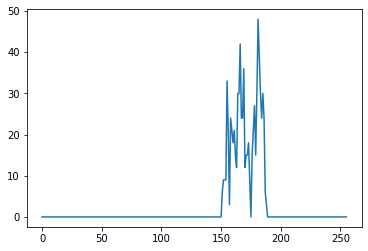

In [101]:
from PIL.Image import ImagePointHandler
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/cameraman1.png")

# Now, the variable 'image' stores the pixel values of image
#print(image)
#cv2_imshow(image)
ihist = cv2.calcHist(image,[0],None,[256],[0,256]).squeeze()
x = np.arange(0,256,1)
plt.plot(x,ihist)
